# **Шаг 1: Загрузка данных.**

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/vikrishnan/boston-house-prices')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mgk717
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices


100%|██████████| 12.8k/12.8k [00:00<00:00, 11.2MB/s]

1. ZN: доля жилых земель, разделенных на участки площадью более 25 000 кв.футов.
2. INDUS: доля акров, не связанных с розничной торговлей, в городе
3. CHAS: фиктивная переменная Charles River (= 1, если участок граничит с рекой; 0 в противном случае).
4. NOX: концентрация оксидов азота (частей на 10 миллионов)
5. RM: среднее количество комнат в доме.
6. ВОЗРАСТ: доля домов, занимаемых владельцами, построенных до 1940 года
7. DIS: взвешенные расстояния до пяти бостонских центров занятости
8. RAD: индекс доступности радиальных магистралей.
9. НАЛОГ: ставка налога на недвижимость в размере полной стоимости с 10 000 долларов США
10. Количество учеников и учителей в зависимости от города 12. B:
1000(Bk-0,63)2, где Bk - доля
чернокожих в населении по городам 13. LSTAT: процент населения с низким статусом
11. MEDV: Средняя стоимость домов, занимаемых владельцами, в 1000 долларов США Мы видим, что входные атрибуты имеют множество единиц измерения.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
          'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
f = ('/content/boston-house-prices/housing.csv')
df = pd.read_csv(f, delim_whitespace=True, names=names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# **Шаг 2: Исследование корреляций.**

In [ ]:
data = df

In [ ]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


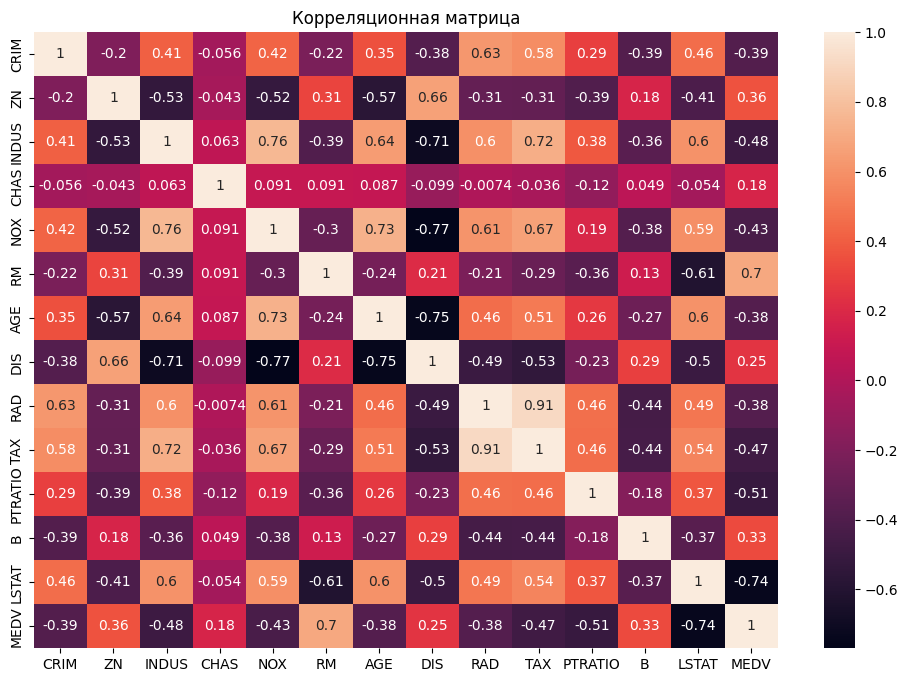

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
import numpy as np

no_diag = correlation_matrix.values
for i in range(len(no_diag)):
    no_diag[i][i] = np.nan


print('Наибольшая корреляция:', np.nanmax(no_diag))
print('Наименьшая корреляция:', np.nanmin(no_diag))


Наибольшая корреляция: 0.9102281885331865
Наименьшая корреляция: -0.7692301132258282


# **Шаг 3: Построение графиков зависимостей.**

In [ ]:
import plotly.express as px

px.scatter(data, x="RM", y="MEDV", trendline='ols',trendline_scope="overall").show()

# **Шаг 4: Подготовка данных.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns= names)
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [ ]:
x = X_scaled.drop('MEDV', axis=1)
y = X_scaled['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Шаг 5: Визуализация трендов.**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

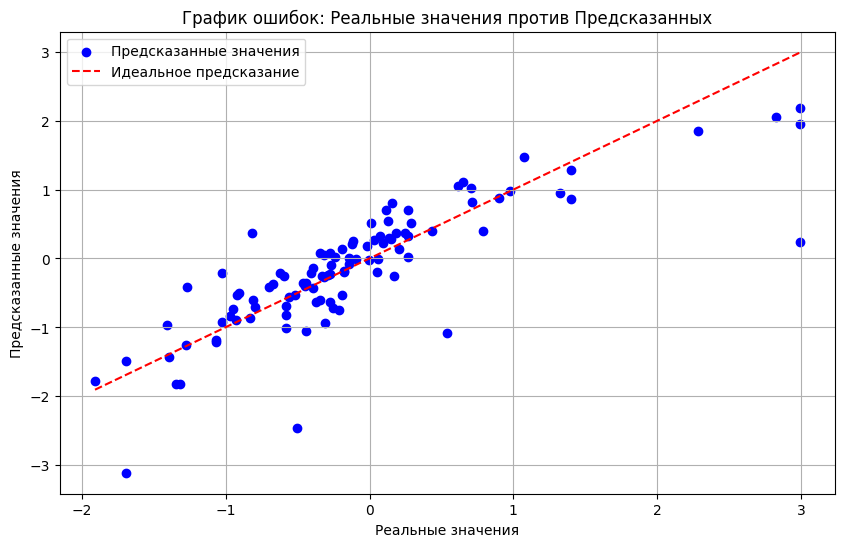

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Идеальное предсказание')

plt.title('График ошибок: Реальные значения против Предсказанных')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid()

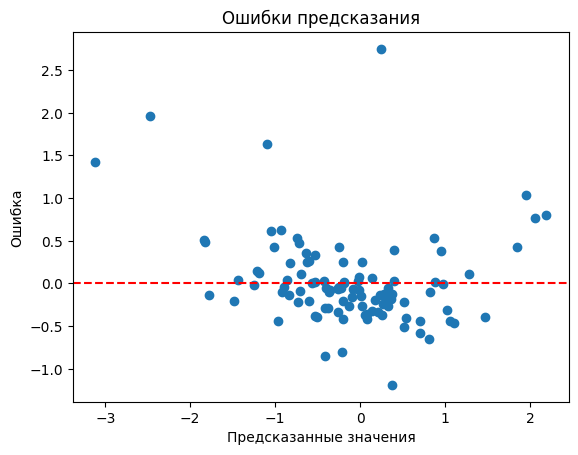

In [ ]:
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(0, color='red', linestyle='--')
plt.title('Ошибки предсказания')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибка')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('MSE:', mse)
print('MAE:', mae)

MSE: 0.28774280014026615
MAE: 0.3470927251421176


# **Шаг 6: Ответьте на вопросы.**
1. Как изменение одного признака влияет на другой?
   - Сильная корреляция между RM и MEDV указывает на то, что увеличение количества комнат в доме связано с увеличением его стоимости. Это может быть объяснено тем, что более просторные дома обычно имеют более высокую цену.

2. Как влияет масштабирование данных на качество модели?
   - Масштабирование данных помогает улучшить производительность моделей машинного обучения, особенно тех, которые чувствительны к масштабу признаков. Это позволяет модели быстрее сходиться и улучшает точность предсказаний.
